In [6]:
import pandas as pd
import requests
from io import StringIO

# Load dataset from UCI
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

column_names = [f"feature_{i}" for i in range(57)] + ["label"]

response = requests.get(data_url)
df = pd.read_csv(StringIO(response.text), header=None, names=column_names)

# Show basic info
print(f"Dataset shape: {df.shape}")
print(df.head())


Dataset shape: (4601, 58)
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_6  feature_7  feature_8  feature_9  ...  feature_48  feature_49  \
0       0.00       0.00       0.00       0.00  ...        0.00       0.000   
1       0.21       0.07       0.00       0.94  ...        0.00       0.132   
2       0.19       0.12       0.64       0.25  ...        0.01       0.143   
3       0.31       0.63       0.31       0.63  ...        0.00       0.137   
4       0.31       0.63       0.31       0.63  ...        0.00       0.135   

   feature_50  feature_51  feature_52  feature_53  feature_54  feature_55  \
0

📊 Default Logistic Regression Results:
Accuracy: 0.9218241042345277
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       531
           1       0.93      0.88      0.91       390

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


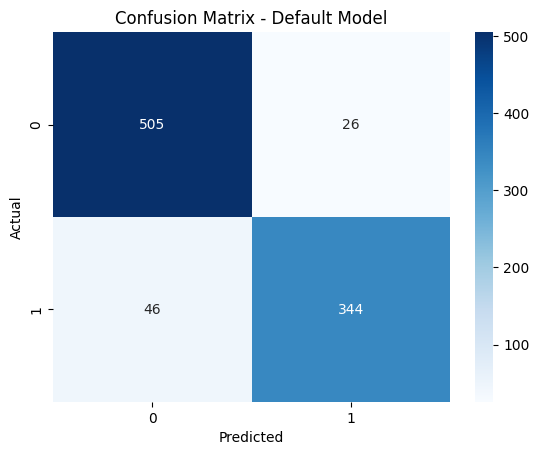

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split data
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train default logistic regression
lr_default = LogisticRegression(max_iter=1000)
lr_default.fit(X_train, y_train)
y_pred_default = lr_default.predict(X_test)

# Evaluate
print("📊 Default Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Default Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 


✅ Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
📈 Fine-Tuned Logistic Regression Results:
Accuracy: 0.9174809989142236
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.92      0.88      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


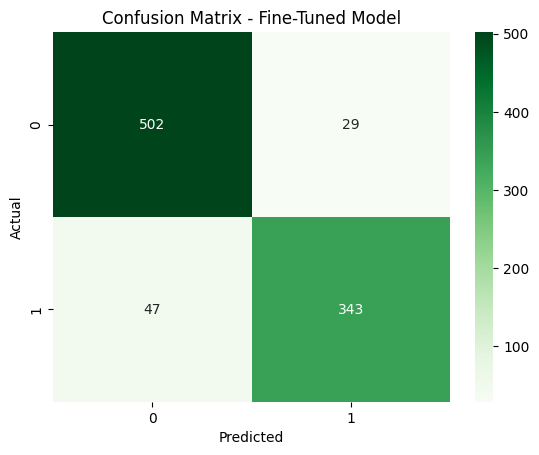

In [8]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# GridSearch
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Best model
best_lr = lr_grid.best_estimator_
print("\n✅ Best Parameters:", lr_grid.best_params_)

# Predict with best model
y_pred_tuned = best_lr.predict(X_test)

# Evaluate
print("📈 Fine-Tuned Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Fine-Tuned Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


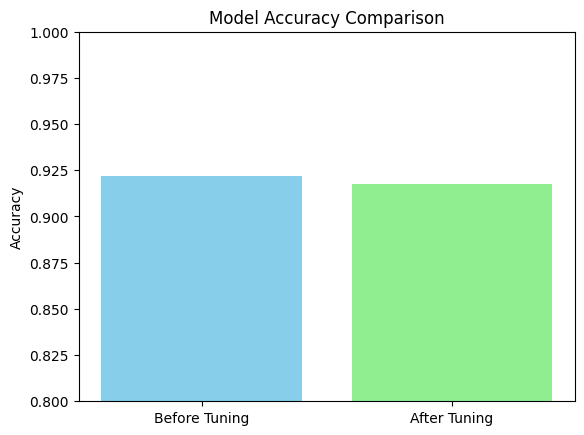

📊 Accuracy Before Tuning: 0.9218
📈 Accuracy After Tuning: 0.9175


In [9]:
# Comparison Plot
accuracy_before = accuracy_score(y_test, y_pred_default)
accuracy_after = accuracy_score(y_test, y_pred_tuned)

plt.bar(["Before Tuning", "After Tuning"], [accuracy_before, accuracy_after], color=["skyblue", "lightgreen"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()

print(f"📊 Accuracy Before Tuning: {accuracy_before:.4f}")
print(f"📈 Accuracy After Tuning: {accuracy_after:.4f}")
